# OSTIA

In [1]:
import xarray as xr
import intake

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmocean.cm as cmo

import pandas as pd

In [2]:
import geostats as gs

In [3]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['disk']['observations']

In [4]:
list(cat['OSTIA']['OSTIA'])

['daily',
 'clim',
 'anom',
 'anom_lr30',
 'anom_lr5',
 'anom_lr12',
 'anom_lr90',
 'anom_latlon_5_5',
 'rossby_0.05deg',
 'rossby_0.25deg',
 'SSTgrad_0_0',
 'SSTgrad_0_LR30',
 'SSTgrad_LR30_0',
 'SSTgrad_LR30_LR30']

In [4]:
ostia_daily = cat['OSTIA']['OSTIA']['daily'].to_dask()
ostia_clim = cat['OSTIA']['OSTIA']['clim'].to_dask()
ostia_anom = cat['OSTIA']['OSTIA']['anom'].to_dask()
ostia_anom_lr30 = cat['OSTIA']['OSTIA']['anom_lr30'].to_dask()

In [5]:
ostia_daily

<xarray.Dataset>
Dimensions:         (time: 14761, lat: 3600, lon: 7200)
Coordinates:
  * lat             (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
  * lon             (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time            (time) datetime64[ns] 1982-01-01T12:00:00 ... 2022-05-31T...
Data variables:
    analysis_error  (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    mask            (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    siconc          (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    sst             (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              servicedesk.cmems@mercator-ocean.eu
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST product
    time_coverage_end:          20220601T000000Z
    time_coverage_start:        20220531T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       a2df4a18-6f19-4772-9532-39307a0e2794
    westernmost_longitude:      -180.0

In [6]:
ostia_clim

<xarray.Dataset>
Dimensions:         (time: 366, lat: 3600, lon: 7200)
Coordinates:
  * lat             (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
  * lon             (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time            (time) datetime64[ns] 2004-01-01 2004-01-02 ... 2004-12-31
Data variables:
    analysis_error  (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    mask            (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    siconc          (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    sst             (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
Attributes:
    description:   Daily climatology with 9-day window
    description2:  applied tricube LOESS filter
    period:        20
    source_data:   /perm/neam/01_SST_VAR/CMEMS/SST_GLO_SST_L4_REP_OBSERVATION...
    years:         [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 199...

In [7]:
ostia_anom

<xarray.Dataset>
Dimensions:         (time: 370, lat: 3600, lon: 7200)
Coordinates:
  * lat             (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
  * lon             (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time            (time) datetime64[ns] 2018-01-01T12:00:00 ... 2019-01-05T...
Data variables:
    analysis_error  (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    mask            (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    siconc          (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
    sst             (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
Attributes: (12/51)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              servicedesk.cmems@mercator-ocean.eu
    ...                         ...
    time_coverage_end:          20220601T000000Z
    time_coverage_start:        20220531T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       a2df4a18-6f19-4772-9532-39307a0e2794
    westernmost_longitude:      -180.0
    years_clim:                 [1990, 1991, 1992, 1993, 1994, 1995, 1996, 19...

In [8]:
ostia_anom_lr30

<xarray.Dataset>
Dimensions:  (lat: 3600, lon: 7200, time: 370)
Coordinates:
  * lat      (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 2018-01-01T12:00:00 ... 2019-01-05T12:00:00
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(10, 1200, 1800), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              servicedesk.cmems@mercator-ocean.eu
    ...                         ...
    time_coverage_end:          20220601T000000Z
    time_coverage_start:        20220531T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       a2df4a18-6f19-4772-9532-39307a0e2794
    westernmost_longitude:      -180.0
    years_clim:                 [1990, 1991, 1992, 1993, 1994, 1995, 1996, 19...

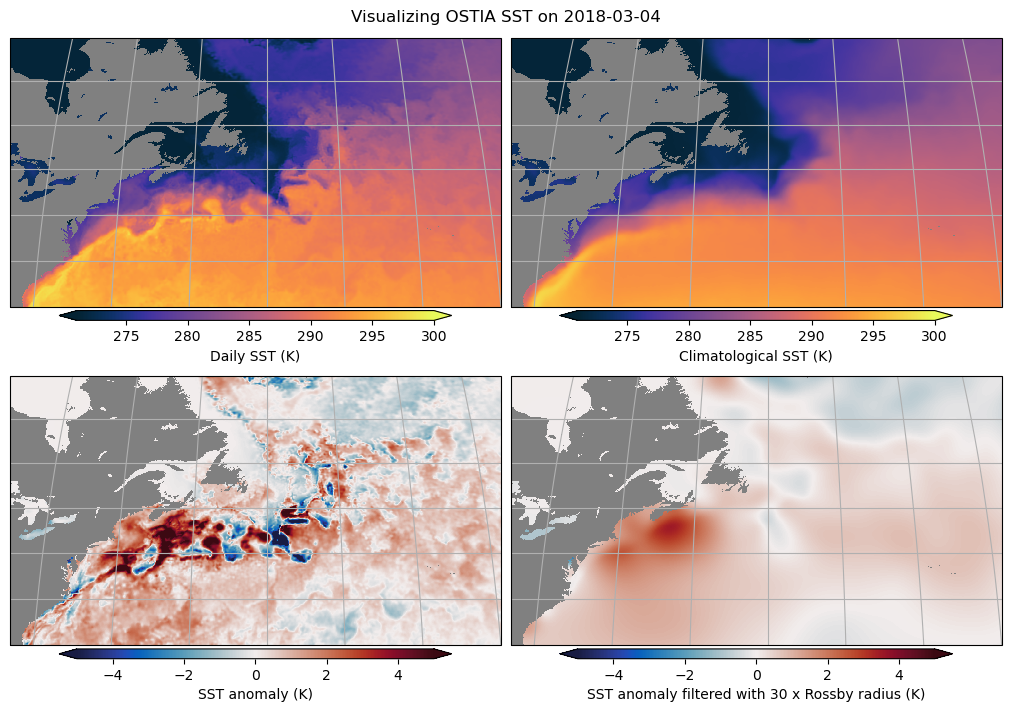

In [11]:
fig, axs = plt.subplots(
    2,
    2,
    constrained_layout=True,
    figsize=(10,7),
    # figsize=(15,10),
    subplot_kw=dict(
        projection=ccrs.Robinson(central_longitude=-50)
    )
)

ax = axs.flatten()

# use this for full resolution
sel = dict(
    lon=slice(-100,-10),
    lat=slice(25,65)
)
# use this low resolution: every 10th point in lat/lon - much faster!
# sel = dict(
#     lon=slice(-100,-10,10),
#     lat=slice(25,65,10)
# )

p = ostia_daily.sst.sel(time='2018-03-04').sel(sel).plot(
    transform=ccrs.PlateCarree(),
    ax=ax[0],
    cmap=cmo.thermal,
    vmin=271,
    vmax=300,
    cbar_kwargs=dict(
        orientation='horizontal',
        shrink=0.8,
        pad=0.0125,
        label='Daily SST (K)',
        extend='both',
        aspect=40
    ),
    rasterized=True
)

q = ostia_clim.sst.sel(time='2004-03-04').sel(sel).plot(
    transform=ccrs.PlateCarree(),
    ax=ax[1],
    cmap=cmo.thermal,
    vmin=271,
    vmax=300,
    cbar_kwargs=dict(
        orientation='horizontal',
        shrink=0.8,
        pad=0.0125,
        label='Climatological SST (K)',
        extend='both',
        aspect=40
    ),
    rasterized=True
)

r = ostia_anom.sst.sel(time='2018-03-04').sel(sel).plot(
    transform=ccrs.PlateCarree(),
    ax=ax[2],
    vmax=5,
    cmap=cmo.balance,
    cbar_kwargs=dict(
        orientation='horizontal',
        shrink=0.8,
        pad=0.0125,
        label='SST anomaly (K)',
        extend='both',
        aspect=40
    ),
    rasterized=True
)

s = ostia_anom_lr30.sst.sel(time='2018-03-04').sel(sel).plot(
    transform=ccrs.PlateCarree(),
    ax=ax[3],
    vmax=5,
    cmap=cmo.balance,
    cbar_kwargs=dict(
        orientation='horizontal',
        shrink=0.8,
        pad=0.0125,
        label='SST anomaly filtered with 30 x Rossby radius (K)',
        extend='both',
        aspect=40
    ),
    rasterized=True
)

[axi.set_extent([-83,-20,30,60],crs=ccrs.PlateCarree()) for axi in ax]
[axi.set_facecolor('grey') for axi in ax]

for axi in ax:
    ll = axi.gridlines()
    axi.set_title('')
    
fig.suptitle('Visualizing OSTIA SST on 2018-03-04')

fig.savefig('ostia_obs_filtered_snapshot.pdf',dpi=300)

(-74.0, -10.0)

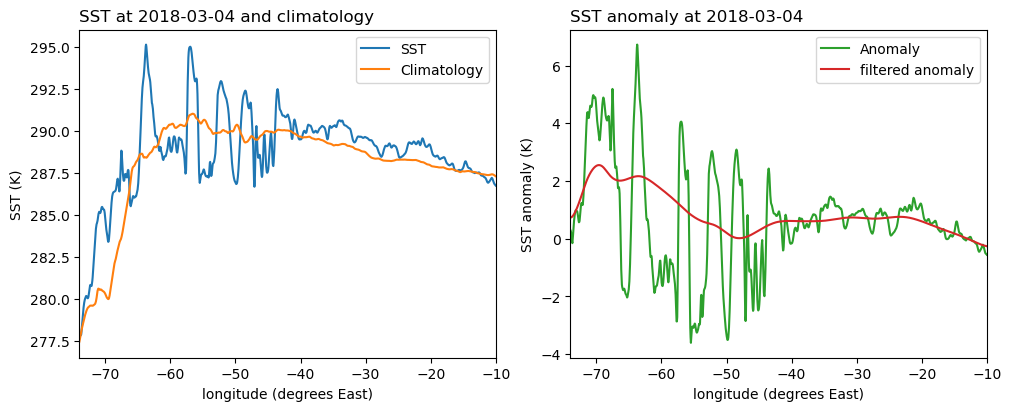

In [101]:
fig, ax = plt.subplots(1,2,sharex=True,constrained_layout=True,figsize=(10,4))

ostia_daily.sst.sel(sel).sel(lat=40,method='nearest').sel(time='2018-03-04 12').plot.line('C0',ax=ax[0],label='SST')
ostia_clim.sst.sel(sel).sel(lat=40,method='nearest').sel(time='2004-03-04').plot.line('C1',ax=ax[0],label='Climatology')
# plt.twinx()
ostia_anom.sst.sel(sel).sel(lat=40,method='nearest').sel(time='2018-03-04 12').plot.line('C2',ax=ax[1],label='Anomaly')
ostia_anom_lr30.sst.sel(sel).sel(lat=40,method='nearest').sel(time='2018-03-04 12').plot.line('C3',ax=ax[1],label='filtered anomaly')

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel('SST (K)')
ax[1].set_ylabel('SST anomaly (K)')

ax[0].set_title('')
ax[1].set_title('')

ax[0].set_title('SST at 2018-03-04 and climatology',loc='left')
ax[1].set_title('SST anomaly at 2018-03-04',loc='left')

ax[0].set_xlabel('longitude (degrees East)')
ax[1].set_xlabel('longitude (degrees East)')

ax[0].set_xlim(-74,-10)

## SST gradients on native IFS grid (tco399, 28 km)

In [17]:
# SST gradients on raw dataset
ostia_SSTgrad_0_0 = cat['OSTIA']['OSTIA']['SSTgrad_0_0'].to_dask()

# SST gradients, with climatology filtered with LR30
ostia_SSTgrad_LR30_0 = cat['OSTIA']['OSTIA']['SSTgrad_LR30_0'].to_dask()

# SST gradients, with anomalies filtered with LR30
ostia_SSTgrad_0_LR30 = cat['OSTIA']['OSTIA']['SSTgrad_0_LR30'].to_dask()

# SST gradients, with climatology and anomalies filtered with LR30
ostia_SSTgrad_LR30_LR30 = cat['OSTIA']['OSTIA']['SSTgrad_LR30_LR30'].to_dask()

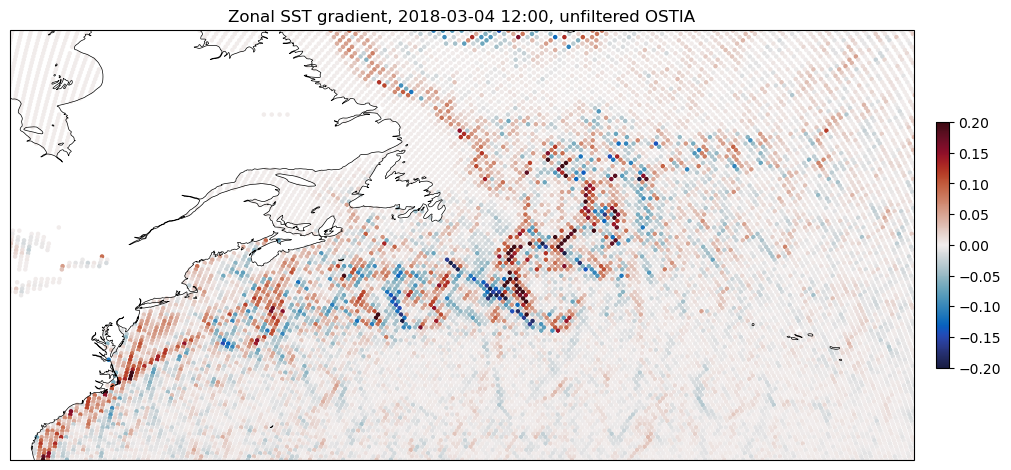

In [31]:
ax = gs.scatter_map(
    ostia_SSTgrad_0_0.dTdx.sel(time='2018-03-04 12:00').load(),
    s=5,
    vmin=-0.2,vmax=0.2,cmap=cmo.balance
)
ax.set_title('Zonal SST gradient, 2018-03-04 12:00, unfiltered OSTIA')

ax.set_extent([-83,-20,30,60],crs=ccrs.PlateCarree())
ax.coastlines(lw=0.5)
# ax.set_facecolor('grey')

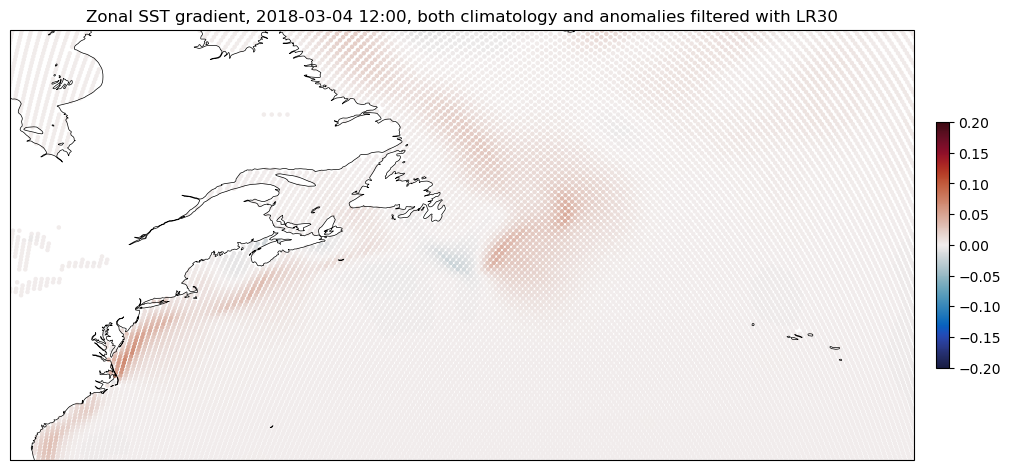

In [36]:
ax = gs.scatter_map(
    ostia_SSTgrad_LR30_LR30.dTdx.sel(time='2018-03-04 12:00').load(),
    s=5,
    vmin=-0.2,vmax=0.2,cmap=cmo.balance
)
ax.set_title('Zonal SST gradient, 2018-03-04 12:00, both climatology and anomalies filtered with LR30')

ax.set_extent([-83,-20,30,60],crs=ccrs.PlateCarree())
ax.coastlines(lw=0.5)
# ax.set_facecolor('grey')